# How well do jobs and skills pay for Data Engineers?

## Methodology
1. Evaluate median salary for the Top 6 data jobs
2. Find median salary per skill for Data Engineers
3. Visualise for highest paying skills and most demanded skills.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/home/munchymahesh/Desktop/Python/Data_Project_On_Python/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# filter for the job titles and country
df_AUS = df[df['job_country']=='Australia'].dropna(subset=['salary_year_avg']) # Filtering for Australia jobs with salary info
job_titles = df_AUS['job_title_short'].value_counts(ascending=False).head(6).index.tolist() # Getting top 6 job titles  
job_titles


['Data Engineer',
 'Senior Data Engineer',
 'Machine Learning Engineer',
 'Data Scientist',
 'Software Engineer',
 'Senior Data Scientist']

In [10]:
df_AUS_top6 = df_AUS[df_AUS['job_title_short'].isin(job_titles)].copy()  # Filtering for top 6 job titles for df_AUS
df_AUS_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
26330,Senior Data Scientist,Senior Data Scientist,"Melbourne VIC, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-03-01 13:25:22,False,False,Australia,year,157500.0,NaN,Block,"[go, snowflake, numpy, pandas, tensorflow, keras]","{'cloud': ['snowflake'], 'libraries': ['numpy'..."
27637,Data Engineer,Data Engineer - FinOps,"Sydney NSW, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-03-27 13:25:00,True,False,Australia,year,147500.0,NaN,Atlassian,"[sql, python, atlassian]","{'other': ['atlassian'], 'programming': ['sql'..."
51626,Data Scientist,Data Scientist (Brain-Computer Interface Team),Anywhere,via Wellfound,Full-time,True,Australia,2023-12-20 06:16:49,False,False,Australia,year,160000.0,NaN,AE Studio,"[python, aws, tensorflow, pytorch, git, github]","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
56804,Machine Learning Engineer,Senior Machine Learning Engineer,"Melbourne VIC, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-07-13 06:15:50,False,False,Australia,year,166000.0,NaN,Block,"[java, javascript, python, kotlin, ruby, ruby,...","{'databases': ['redis', 'cassandra', 'mysql'],..."
61595,Machine Learning Engineer,Senior / Lead Machine Learning Engineer,"Sydney NSW, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-03-23 06:26:19,False,False,Australia,year,79200.0,NaN,Neara,"[python, c++, java]","{'programming': ['python', 'c++', 'java']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773501,Data Engineer,Data Engineer (Melbourne & Sydney),"Malvern East VIC, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-02-17 01:23:34,True,False,Australia,year,147500.0,NaN,The Data Foundry,"[go, python, java, aws, node.js, bitbucket, je...","{'cloud': ['aws'], 'other': ['bitbucket', 'jen..."
775854,Machine Learning Engineer,Machine Learning Engineer,"Sydney NSW, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-01-10 01:19:54,False,False,Australia,year,166000.0,NaN,Anduril Industries,"[python, airflow, docker]","{'libraries': ['airflow'], 'other': ['docker']..."
777181,Data Engineer,Machine Learning/Data Engineer,Anywhere,via LinkedIn,Full-time,True,Australia,2023-10-23 05:27:08,False,False,Australia,year,120000.0,NaN,Red Marker,"[python, sql, pandas, numpy, nltk, tensorflow,...","{'libraries': ['pandas', 'numpy', 'nltk', 'ten..."
778270,Software Engineer,Senior Software Engineer (Data Visualisation),"Sydney NSW, Australia",via Ai-Jobs.net,Full-time,False,Australia,2023-08-08 05:50:43,True,False,Australia,year,79200.0,NaN,Neara,"[html, css, sass, swift, react, angular, vue]","{'libraries': ['react'], 'programming': ['html..."


In [14]:
job_order = df_AUS_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index # Getting median salaries for top 6 job titles

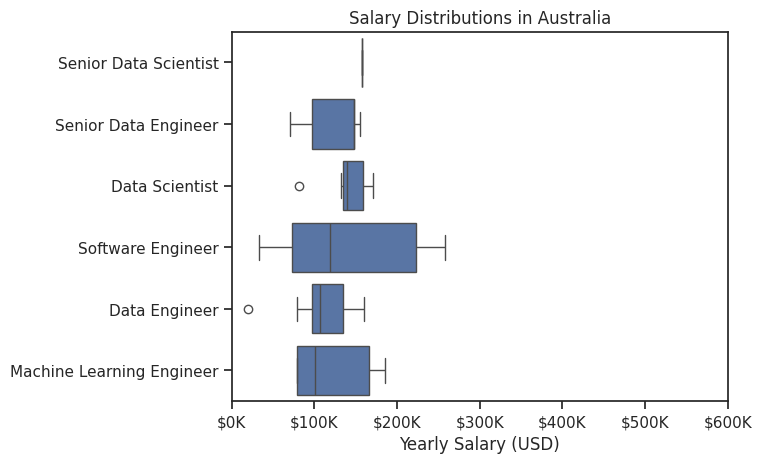

In [16]:
sns.boxplot(data=df_AUS_top6, x='salary_year_avg', y='job_title_short',order=job_order)
sns.set_theme(style='ticks')

# this is all the same
plt.title('Salary Distributions in Australia')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investigate Median Salary Vs Skill for Data Engineers

In [18]:
# Filtering for Data Engineer jobs in Australia
df_DE_AUS = df[(df['job_title_short']=='Data Engineer') & (df['job_country']=='Australia')].copy()  
df_DE_AUS = df_DE_AUS.dropna(subset=['salary_year_avg'])  # Dropping rows with missing salary info

In [19]:
df_DE_AUS = df_DE_AUS.explode('job_skills')  # Exploding job_skills list to multiple rows   
df_DE_AUS[['salary_year_avg','job_skills']].head(5)  # Displaying salary and skills columns

,salary_year_avg,job_skills
27637,147500.0,sql
27637,147500.0,python
27637,147500.0,atlassian
70312,125000.0,python
70312,125000.0,sql


In [24]:
# Analyzing top skills for Data Engineers in Australia based on median salary
df_DE_top_pay = df_DE_AUS.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False).head(10)
df_DE_top_pay

,count,median
job_skills,,
ssis,1,160000.0
bitbucket,1,147500.0
c,1,147500.0
git,1,147500.0
atlassian,1,147500.0
node.js,1,147500.0
powershell,1,131580.0
go,5,131580.0
pyspark,2,129250.0


In [25]:
# Analyzing top skills for Data Engineers in Australia based on count of skills occurrences
df_DE_skills =df_DE_AUS.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False).head(10)
df_DE_skills

,count,median
job_skills,,
sql,22,100363.25
python,20,106712.50
aws,12,118000.00
azure,12,100354.00
gcp,6,96773.00
snowflake,6,97108.50
go,5,131580.00
docker,4,96773.00
java,4,96773.00


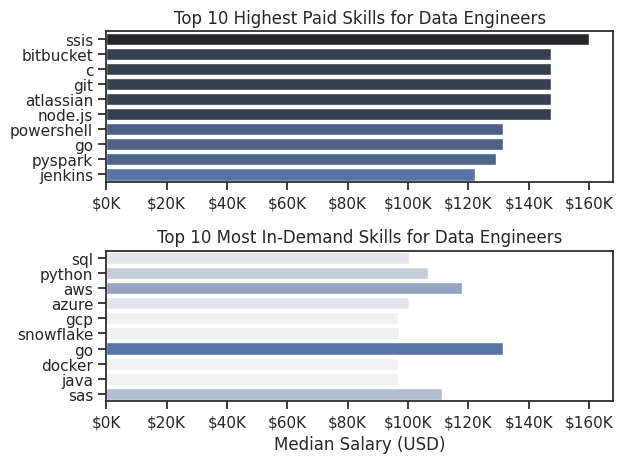

In [28]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Engineers
sns.barplot(data=df_DE_top_pay, x='median', y=df_DE_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DE_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Engineers')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Engineers
sns.barplot(data=df_DE_skills, x='median', y=df_DE_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DE_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Engineers')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()